In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-stocks-2025/AMZN_stock_data.csv


In [12]:
data= pd.read_csv("/kaggle/input/amazon-stocks-2025/AMZN_stock_data.csv")
print(data.head())
print(data.info())
print(data.describe())

                        Date      Open      High       Low     Close  \
0  1997-05-15 00:00:00-04:00  0.121875  0.125000  0.096354  0.097917   
1  1997-05-16 00:00:00-04:00  0.098438  0.098958  0.085417  0.086458   
2  1997-05-19 00:00:00-04:00  0.088021  0.088542  0.081250  0.085417   
3  1997-05-20 00:00:00-04:00  0.086458  0.087500  0.081771  0.081771   
4  1997-05-21 00:00:00-04:00  0.081771  0.082292  0.068750  0.071354   

       Volume  Dividends  Stock Splits  
0  1443120000        0.0           0.0  
1   294000000        0.0           0.0  
2   122136000        0.0           0.0  
3   109344000        0.0           0.0  
4   377064000        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64


In [13]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [14]:
import matplotlib.pyplot as plt # matplotlib for creating plots

data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [15]:
data['Date'] = pd.to_datetime(data['Date']) # converting date to datetime

/tmp/ipykernel_39/3234872336.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date']) # converting date to datetime


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [17]:
data.set_index('Date', inplace=True) # setting date as index
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [18]:
data.sort_index(inplace=True) #sort by date


In [19]:
# Checking date range
print(f"Start Date: {data.index.min()}")
print(f"End Date: {data.index.max()}")
print(f"Total Days: {len(data)}")

Start Date: 1997-05-15 00:00:00-04:00
End Date: 2025-02-21 00:00:00-05:00
Total Days: 6987


In [20]:
# checking line for dupicates
data.index.duplicated().sum()

0

In [21]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-14 00:00:00-05:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0
2025-02-18 00:00:00-05:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0
2025-02-19 00:00:00-05:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0
2025-02-20 00:00:00-05:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0
2025-02-21 00:00:00-05:00,223.279999,223.309998,214.740005,216.580002,55161000,0.0,0.0


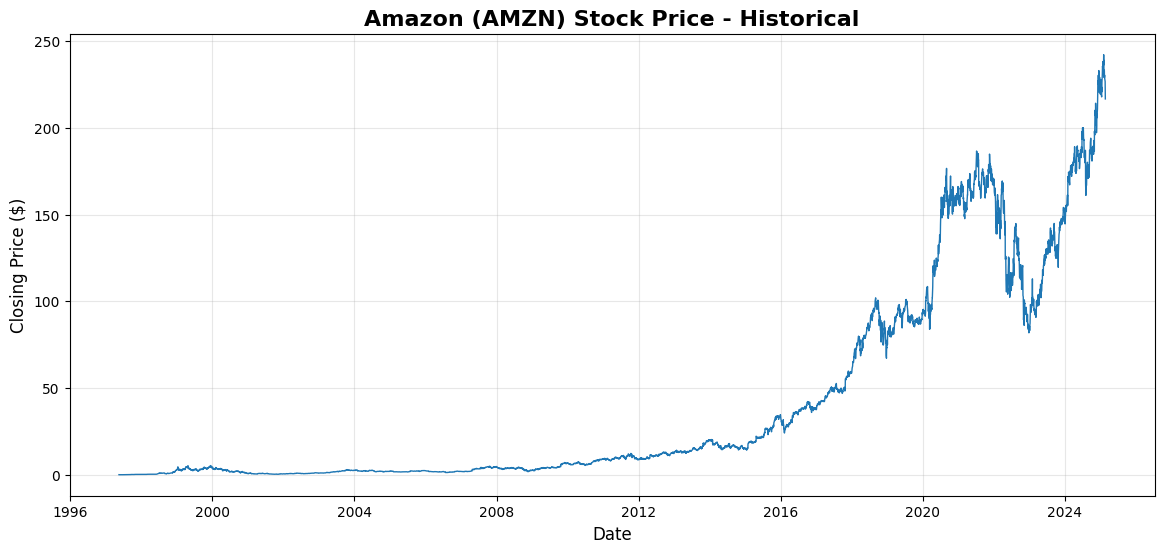

In [23]:
# stock price overtime
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], linewidth=1)
plt.title('Amazon (AMZN) Stock Price - Historical', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
# feature 1: Daily Returns (Price change from Yesterday)
data['Daily_Return'] = data['Close'].pct_change()
data[['Close', 'Daily_Return']].head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Close,Daily_Return
Date,,
1997-05-15 00:00:00-04:00,0.097917,NaN
1997-05-16 00:00:00-04:00,0.086458,-0.117028
1997-05-19 00:00:00-04:00,0.085417,-0.012040
1997-05-20 00:00:00-04:00,0.081771,-0.042685
1997-05-21 00:00:00-04:00,0.071354,-0.127392
1997-05-22 00:00:00-04:00,0.069792,-0.021891
1997-05-23 00:00:00-04:00,0.075000,0.074622
1997-05-27 00:00:00-04:00,0.079167,0.055560
1997-05-28 00:00:00-04:00,0.076563,-0.032892


In [25]:
data[['Close', 'Daily_Return']].tail(10)

,Close,Daily_Return
Date,,
2025-02-07 00:00:00-05:00,229.149994,-0.040531
2025-02-10 00:00:00-05:00,233.139999,0.017412
2025-02-11 00:00:00-05:00,232.759995,-0.001630
2025-02-12 00:00:00-05:00,228.929993,-0.016455
2025-02-13 00:00:00-05:00,230.369995,0.006290
2025-02-14 00:00:00-05:00,228.679993,-0.007336
2025-02-18 00:00:00-05:00,226.649994,-0.008877
2025-02-19 00:00:00-05:00,226.630005,-0.000088
2025-02-20 00:00:00-05:00,222.880005,-0.016547


In [27]:
# feature 2: Price Change (Absolute Dollar Amount)
data['Price_Change'] = data['Close'] - data['Open']
print(data[['Open', 'Close', 'Price_Change']].head(10))
print(data[['Open', 'Close', 'Price_Change']].tail(10))


                               Open     Close  Price_Change
Date                                                       
1997-05-15 00:00:00-04:00  0.121875  0.097917     -0.023958
1997-05-16 00:00:00-04:00  0.098438  0.086458     -0.011980
1997-05-19 00:00:00-04:00  0.088021  0.085417     -0.002604
1997-05-20 00:00:00-04:00  0.086458  0.081771     -0.004687
1997-05-21 00:00:00-04:00  0.081771  0.071354     -0.010417
1997-05-22 00:00:00-04:00  0.071875  0.069792     -0.002083
1997-05-23 00:00:00-04:00  0.070313  0.075000      0.004687
1997-05-27 00:00:00-04:00  0.075521  0.079167      0.003646
1997-05-28 00:00:00-04:00  0.081250  0.076563     -0.004687
1997-05-29 00:00:00-04:00  0.077083  0.075260     -0.001823
                                 Open       Close  Price_Change
Date                                                           
2025-02-07 00:00:00-05:00  232.500000  229.149994     -3.350006
2025-02-10 00:00:00-05:00  230.550003  233.139999      2.589996
2025-02-11 00:00:00-05:0

In [28]:
# feature 3: Price Change Pecentage
data['Price_Change_Pct'] = ((data['Close'] - data['Open']) / data['Open']) * 100
print(data[['Open', 'Close', 'Price_Change_Pct']].head(10))
print(data[['Open', 'Close', 'Price_Change_Pct']].tail(10))

                               Open     Close  Price_Change_Pct
Date                                                           
1997-05-15 00:00:00-04:00  0.121875  0.097917        -19.657850
1997-05-16 00:00:00-04:00  0.098438  0.086458        -12.170101
1997-05-19 00:00:00-04:00  0.088021  0.085417         -2.958385
1997-05-20 00:00:00-04:00  0.086458  0.081771         -5.421125
1997-05-21 00:00:00-04:00  0.081771  0.071354        -12.739234
1997-05-22 00:00:00-04:00  0.071875  0.069792         -2.898082
1997-05-23 00:00:00-04:00  0.070313  0.075000          6.665914
1997-05-27 00:00:00-04:00  0.075521  0.079167          4.827798
1997-05-28 00:00:00-04:00  0.081250  0.076563         -5.768611
1997-05-29 00:00:00-04:00  0.077083  0.075260         -2.364984
                                 Open       Close  Price_Change_Pct
Date                                                               
2025-02-07 00:00:00-05:00  232.500000  229.149994         -1.440863
2025-02-10 00:00:00-05:00  2

In [29]:
# feature 4: Moving Average - 5 Day 
data['MA_5'] = data['Close'].rolling(window=5).mean()
print(data[['Close', 'MA_5']].head(10))
print(data[['Close', 'MA_5']].tail(10))

                              Close      MA_5
Date                                         
1997-05-15 00:00:00-04:00  0.097917       NaN
1997-05-16 00:00:00-04:00  0.086458       NaN
1997-05-19 00:00:00-04:00  0.085417       NaN
1997-05-20 00:00:00-04:00  0.081771       NaN
1997-05-21 00:00:00-04:00  0.071354  0.084583
1997-05-22 00:00:00-04:00  0.069792  0.078958
1997-05-23 00:00:00-04:00  0.075000  0.076667
1997-05-27 00:00:00-04:00  0.079167  0.075417
1997-05-28 00:00:00-04:00  0.076563  0.074375
1997-05-29 00:00:00-04:00  0.075260  0.075156
                                Close        MA_5
Date                                             
2025-02-07 00:00:00-05:00  229.149994  236.725998
2025-02-10 00:00:00-05:00  233.139999  235.869998
2025-02-11 00:00:00-05:00  232.759995  234.009998
2025-02-12 00:00:00-05:00  228.929993  232.561996
2025-02-13 00:00:00-05:00  230.369995  230.869995
2025-02-14 00:00:00-05:00  228.679993  230.775995
2025-02-18 00:00:00-05:00  226.649994  229.47799

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [30]:
# feature 5: Volatility ( Daily Trading Range)
data['Volatility'] = data['High'] - data['Low']
data[['High', 'Low', 'Volatility']].head(10)

,High,Low,Volatility
Date,,,
1997-05-15 00:00:00-04:00,0.125000,0.096354,0.028646
1997-05-16 00:00:00-04:00,0.098958,0.085417,0.013541
1997-05-19 00:00:00-04:00,0.088542,0.081250,0.007292
1997-05-20 00:00:00-04:00,0.087500,0.081771,0.005729
1997-05-21 00:00:00-04:00,0.082292,0.068750,0.013542
1997-05-22 00:00:00-04:00,0.072396,0.065625,0.006771
1997-05-23 00:00:00-04:00,0.076042,0.066667,0.009375
1997-05-27 00:00:00-04:00,0.082292,0.072917,0.009375
1997-05-28 00:00:00-04:00,0.081771,0.076563,0.005208


In [31]:
#feature 6: Volume Change (Is trading volume increasing?)
data['Volume_Change'] = data['Volume'].pct_change()


In [32]:
# feature 7: Target Variable (Up or Down)
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data[['Close', 'Target']].head(10)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,Close,Target
Date,,
1997-05-15 00:00:00-04:00,0.097917,0
1997-05-16 00:00:00-04:00,0.086458,0
1997-05-19 00:00:00-04:00,0.085417,0
1997-05-20 00:00:00-04:00,0.081771,0
1997-05-21 00:00:00-04:00,0.071354,0
1997-05-22 00:00:00-04:00,0.069792,1
1997-05-23 00:00:00-04:00,0.075000,1
1997-05-27 00:00:00-04:00,0.079167,0
1997-05-28 00:00:00-04:00,0.076563,0


In [33]:
data.head(25)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Price_Change,Price_Change_Pct,MA_5,Volatility,Volume_Change,Target
Date,,,,,,,,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,NaN,-0.023958,-19.657850,NaN,0.028646,NaN,0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,-0.117028,-0.011980,-12.170101,NaN,0.013541,-0.796275,0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,-0.012040,-0.002604,-2.958385,NaN,0.007292,-0.584571,0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,-0.042685,-0.004687,-5.421125,NaN,0.005729,-0.104736,0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,-0.127392,-0.010417,-12.739234,0.084583,0.013542,2.448420,0
1997-05-22 00:00:00-04:00,0.071875,0.072396,0.065625,0.069792,235536000,0.0,0.0,-0.021891,-0.002083,-2.898082,0.078958,0.006771,-0.375342,1
1997-05-23 00:00:00-04:00,0.070313,0.076042,0.066667,0.075000,318744000,0.0,0.0,0.074622,0.004687,6.665914,0.076667,0.009375,0.353271,1
1997-05-27 00:00:00-04:00,0.075521,0.082292,0.072917,0.079167,173952000,0.0,0.0,0.055560,0.003646,4.827798,0.075417,0.009375,-0.454258,0
1997-05-28 00:00:00-04:00,0.081250,0.081771,0.076563,0.076563,91488000,0.0,0.0,-0.032892,-0.004687,-5.768611,0.074375,0.005208,-0.474062,0


In [34]:
data.isnull().sum() #checking for NAN values

Open                0
High                0
Low                 0
Close               0
Volume              0
Dividends           0
Stock Splits        0
Daily_Return        1
Price_Change        0
Price_Change_Pct    0
MA_5                4
Volatility          0
Volume_Change       1
Target              0
dtype: int64

In [35]:
data.dropna(inplace=True) #removing NaN values


In [36]:
print(f"Shape after cleaning: {data.shape}")
data.isnull().sum()

Shape after cleaning: (6983, 14)


Open                0
High                0
Low                 0
Close               0
Volume              0
Dividends           0
Stock Splits        0
Daily_Return        0
Price_Change        0
Price_Change_Pct    0
MA_5                0
Volatility          0
Volume_Change       0
Target              0
dtype: int64

In [37]:
data['Target'].value_counts() # checking Target distribution

Target
1    3557
0    3426
Name: count, dtype: int64

In [38]:
data.columns.tolist()

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'Daily_Return',
 'Price_Change',
 'Price_Change_Pct',
 'MA_5',
 'Volatility',
 'Volume_Change',
 'Target']